## Data Exploration and Preprocessing

In [1]:
# Import all libraries from the 'imports.ipynb'
%run _imports.ipynb

In [2]:
# Import Data

file_path = '../data/breast-cancer-wisconsin-data_work.csv'
dataset = pd.read_csv(file_path)
df = dataset.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Statistical Summary - Exploration

In [3]:
df.info()

# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
# Values of the type Float/Int(Numerical categories)
df.select_dtypes(include=["float", "int"]).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
len(df.select_dtypes(include=["float", "int"]).columns)

32

In [7]:
# Values of the type Object (Categorical)
df.select_dtypes(include="object").columns

Index(['diagnosis'], dtype='object')

In [8]:
# Statistical Summary

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Handling Missing Values

In [9]:
# Check if there's any missing data in the dataframe
df.isnull().values.any()

np.True_

In [10]:
# Check for columns containing for null values

df.columns[df.isnull().any()]


Index(['Unnamed: 32'], dtype='object')

In [11]:
df["Unnamed: 32"].count()

np.int64(0)

In [12]:
# Drop the Unnamed column
df = df.drop(columns="Unnamed: 32")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Verify if there's no column with null values
df.columns[df.isnull().any()]

Index([], dtype='object')

### Handling Categorical Variables

In [14]:
# Check for categorical variables
df.select_dtypes(include="object").head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [15]:
# Check for uniques values
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [16]:
# Hot Encoding

df_encoded = pd.get_dummies(data=df, drop_first=True, dtype=int)
df_encoded.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


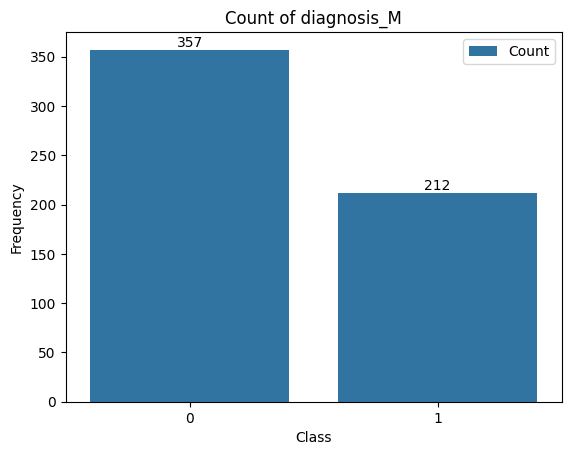

In [17]:
# Countplot using Seaborn
fig, ax = plt.subplots()
sns.countplot(x=df_encoded["diagnosis_M"], label = "Count")

# Customize the plot
ax.set(
    title="Count of diagnosis_M",
    ylabel="Frequency",
    xlabel="Class"
)

# Show Count of each bar
ax.bar_label(ax.containers[0])
# Code Source - "https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot"

plt.show()


### Feature Correlation Analysis

In [18]:
# Split data into Features and Target
X = df_encoded.drop(columns=["id", "diagnosis_M"]) # features
y = df_encoded["diagnosis_M"] # target

In [19]:
# Check which features have good correlation with the target

X_corr_y = X.corrwith(y)
X_corr_y.head()

radius_mean        0.730029
texture_mean       0.415185
perimeter_mean     0.742636
area_mean          0.708984
smoothness_mean    0.358560
dtype: float64

In [20]:
# Sort the above correlation values in descending order
X_corr_y = X_corr_y.sort_values(ascending=False)
X_corr_y

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

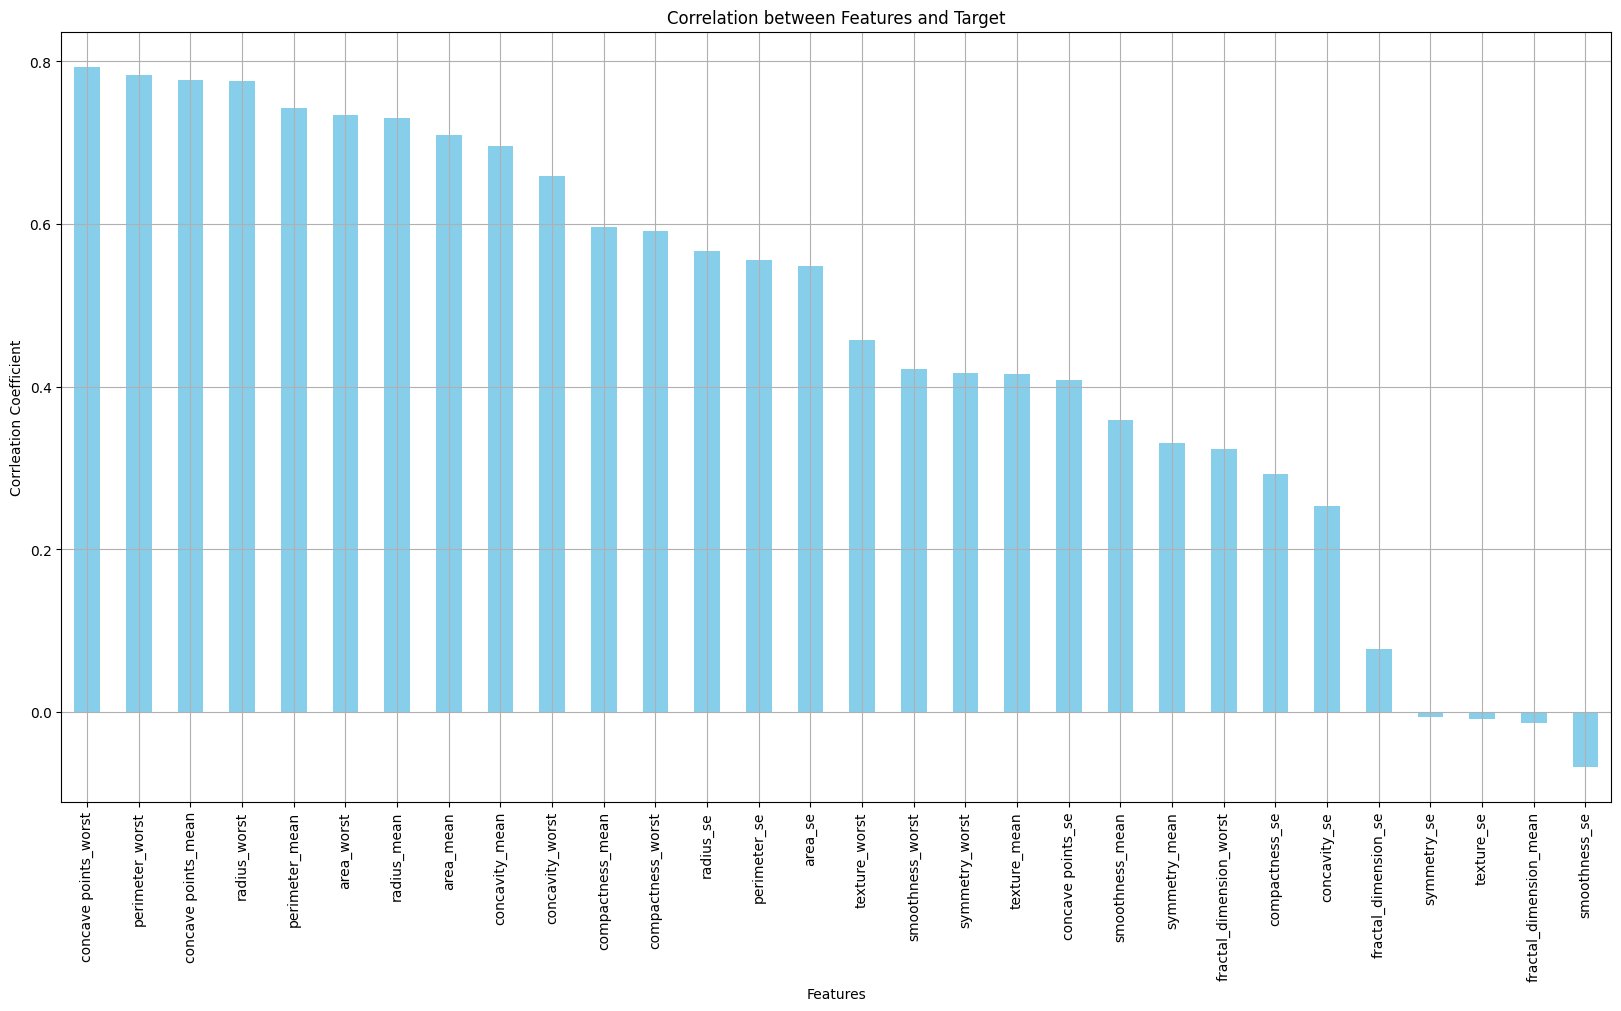

In [21]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (20, 10))

# Create the bar plot
X_corr_y.plot(
    kind='bar', 
    color='skyblue', 
    rot=90,
    grid=True)

# Customize the chart
ax.set(
    title = "Correlation between Features and Target",
    xlabel = "Features",
    ylabel = "Corrleation Coefficient"
)

plt.show()

In [22]:
# Correlation Matrix
X_corr_X = X.corr()
X_corr_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


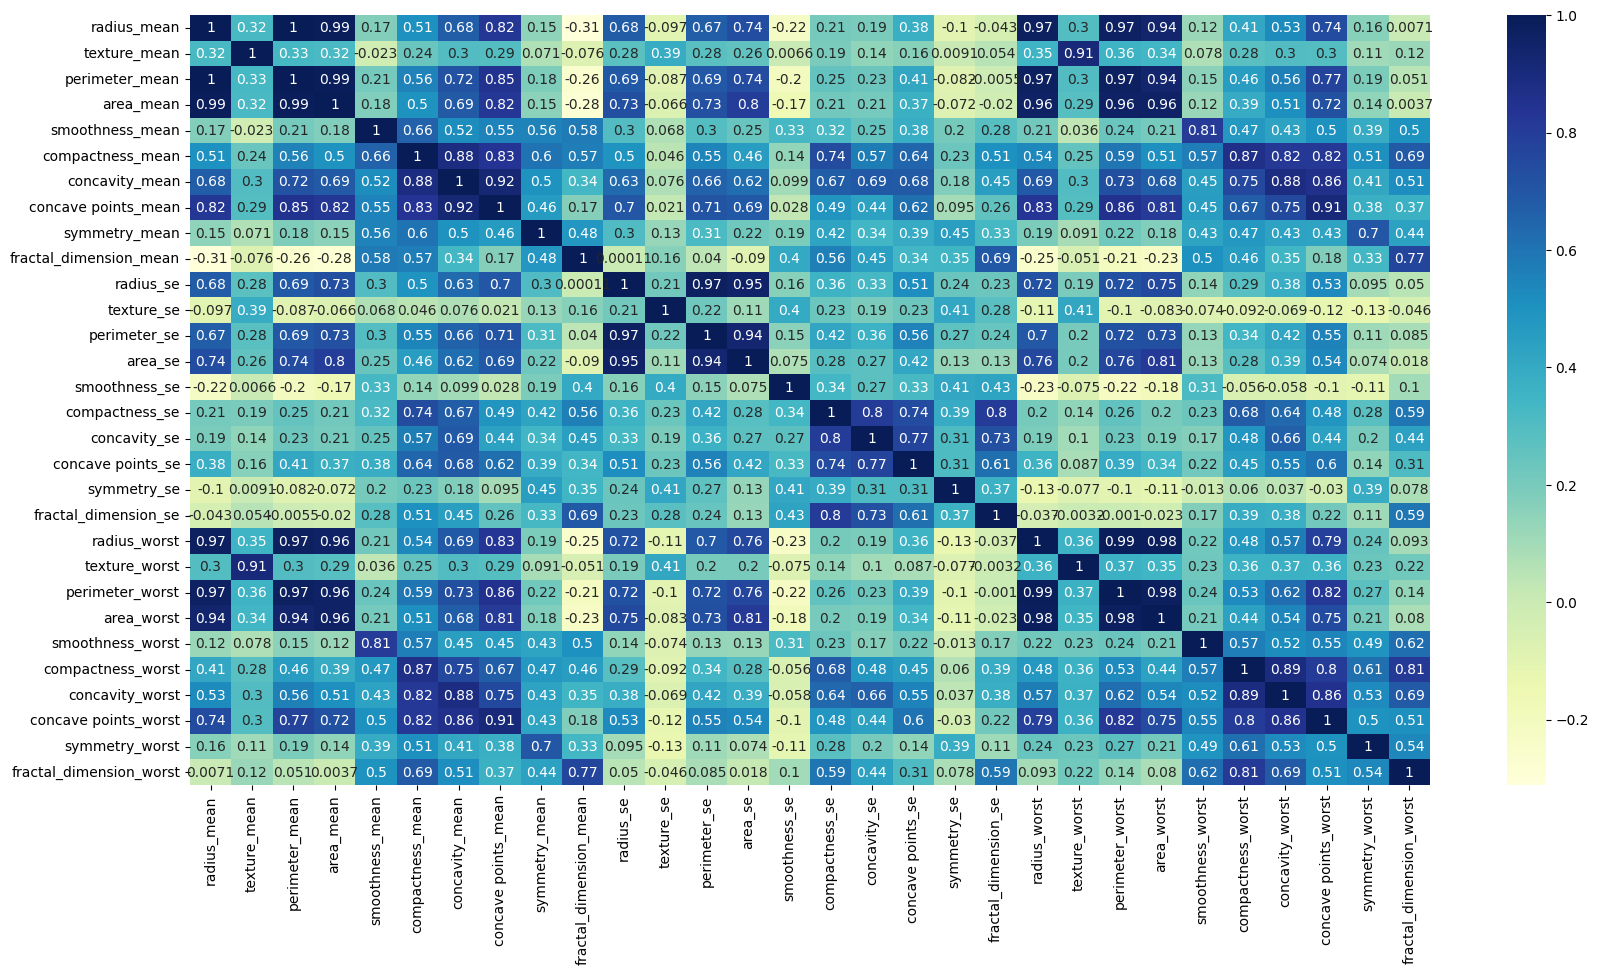

In [23]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(X_corr_X, cmap="YlGnBu", annot=True)
plt.show()

### Train/Test Splitting

In [24]:
df_encoded.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [25]:
# X, y split
X = df_encoded.drop(columns=["id", "diagnosis_M"])
y = df_encoded["diagnosis_M"]

In [26]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
X.shape

(569, 30)

In [28]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(
    X_train.shape,
    X_test.shape)

(455, 30) (114, 30)


### Feature Scaling

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train, X_test

(array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
          2.09724217,  1.88645014],
        [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
          1.89116053,  2.49783848],
        [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
          0.59760192,  0.0578942 ],
        ...,
        [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
         -0.70863864, -1.27145475],
        [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
          0.43432185,  1.21336207],
        [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
         -0.3345212 , -0.84628745]]),
 array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
          0.17275669,  0.20372995],
        [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
         -0.561211  , -1.00838949],
        [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
         -0.10783139, -0.20629287],
        ...,
        [-0.73547237, -0.99852603, -0.74138839, ..., -

## Building the Model

I'm going to apply three classification models and then compare the outcome
* Logistic Regression
* Random Forest
* Linear SVC

### Logistic Regression

In [32]:
clf_logReg = LogisticRegression()

# Train the model on the training data
clf_logReg.fit(X_train, y_train)

# Predict the target values
y_pred = clf_logReg.predict(X_test)

In [33]:
y_pred.shape, y_test.shape

((114,), (114,))

In [34]:
# The confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70  1]
 [ 2 41]]


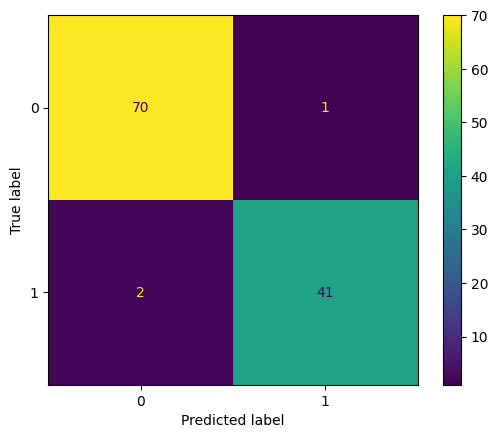

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logReg.classes_)
disp.plot()
plt.show()

In [36]:
# Evaluate the model's performance (Classification Report)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [37]:
# Cross Validation score
cv_scores = cross_val_score(clf_logReg, X_train, y_train, cv=10)
print(cv_scores)

[0.97826087 0.97826087 0.97826087 0.95652174 1.         1.
 0.97777778 0.97777778 0.95555556 0.93333333]


In [38]:
print(f"Accurcacy is {cv_scores.mean()*100:.2f}%") # Overall accuracy
print(f"Standard deviation is {cv_scores.std()*100:.2f}") # Overall standard deviation

Accurcacy is 97.36%
Standard deviation is 1.93


### Random Forest Classifier

In [39]:
clf_rf = RandomForestClassifier()

# Train the model on the data
clf_rf.fit(X_train, y_train)

# Predict values of y
y_pred = clf_rf.predict(X_test)

In [40]:
y_pred.shape, y_test.shape

((114,), (114,))

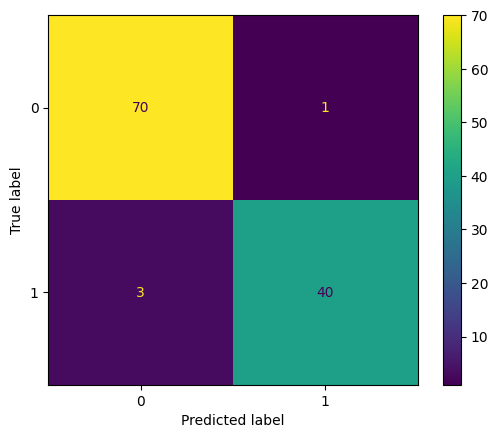

In [41]:
# Model Evaluation

# The confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_rf.classes_)
disp.plot()
plt.show()

In [42]:
# Evaluate the model's performance (Classification Report)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [43]:
# Cross Validation score
cv_scores = cross_val_score(clf_rf, X_train, y_train, cv=10)
print(cv_scores)

print(f"Accurcacy is {cv_scores.mean()*100:.2f}%") # Overall accuracy
print(f"Standard deviation is {cv_scores.std()*100:.2f}") # Overall standard deviation

[1.         0.97826087 0.97826087 0.91304348 0.97826087 0.97777778
 0.95555556 0.95555556 0.97777778 0.93333333]
Accurcacy is 96.48%
Standard deviation is 2.44


### Support Vector Machine - Classifier

In [44]:
svc = SVC()

# Train the model on the data
svc.fit(X_train, y_train)

# Predict values of y
y_pred = svc.predict(X_test)

In [45]:
y_pred.shape, y_test.shape

((114,), (114,))

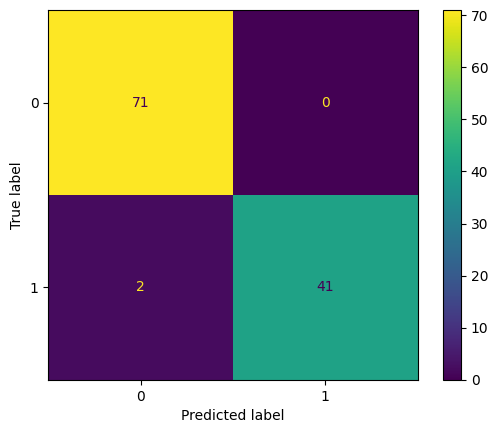

In [46]:
# Model Evaluation

# The confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

In [47]:
# Evaluate the model's performance (Classification Report)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [48]:
# Evaluate the model's performance (Classification Report)

report = classification_report(y_test, y_pred, output_dict=True)
report

{'0': {'precision': 0.9726027397260274,
  'recall': 1.0,
  'f1-score': 0.9861111111111112,
  'support': 71.0},
 '1': {'precision': 1.0,
  'recall': 0.9534883720930233,
  'f1-score': 0.9761904761904762,
  'support': 43.0},
 'accuracy': 0.9824561403508771,
 'macro avg': {'precision': 0.9863013698630136,
  'recall': 0.9767441860465116,
  'f1-score': 0.9811507936507937,
  'support': 114.0},
 'weighted avg': {'precision': 0.9829367940398942,
  'recall': 0.9824561403508771,
  'f1-score': 0.9823691172375383,
  'support': 114.0}}

In [49]:
report["macro avg"]["f1-score"]

0.9811507936507937

In [50]:
# Cross Validation score
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
print(cv_scores)

print(f"Accurcacy is {cv_scores.mean()*100:.2f}%") # Overall accuracy
print(f"Standard deviation is {cv_scores.std()*100:.2f}") # Overall standard deviation

[0.97826087 0.97826087 0.97826087 0.95652174 0.97826087 1.
 1.         0.97777778 0.97777778 0.88888889]
Accurcacy is 97.14%
Standard deviation is 2.99


### Function for Model Training

A function will simply my work in training and evaluating the models

In [51]:
import sys
import os

# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

# Import the function from functions.py
from functions import evaluate_classification_models, evaluate_classification_models_2

In [52]:
Stop code running here

SyntaxError: invalid syntax (3035793500.py, line 1)

In [53]:
import pandas as pd

# Models to be trained
models = {
    "Logistic Regression": LogisticRegression,
    "RandomForest Classifier": RandomForestClassifier,
    "Support Vector Machine": SVC
}

# Model Training and Evaluation
metrics_df = evaluate_classification_models_2(models, 10, X_train, y_train, X_test, y_test)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,CV Accuracy
0,Logistic Regression,97.37%,0.974206,0.969702,0.971863,97.36%
1,RandomForest Classifier,96.49%,0.967257,0.958074,0.962302,96.26%
2,Support Vector Machine,98.25%,0.986301,0.976744,0.981151,97.14%


### Hyperparameter Tuning

Using Randomized SearchCV

In [54]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [55]:
# Create a dictionary with the hyperparameters to adjust and the values to try
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga']
}

# Instantiate and Setup Randomized Search CV
rs_clf = RandomizedSearchCV(
    estimator = clf_logReg, 
    param_distributions = param_grid,
    n_iter = 5, # number of models to try
    cv  = 5,
    verbose=3,
    n_jobs = -1,
    scoring = "roc_auc",
    error_score=np.nan  # Ignore errors and continue with np.nan as score
)


# Fit/train the model
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\miniconda3\Lib\site-packa

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5,
                                              1.75, 2],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [56]:
# Check for best parameters
best_params = rs_clf.best_params_
best_params

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.25}

### Final Model

In [57]:
# Final Model Training using the best parameters
final_model = LogisticRegression(
    solver=best_params["solver"], penalty = best_params["penalty"], C= best_params["C"]
)
final_model.fit(X_train, y_train)

y_preds = final_model.predict(X_test)

In [58]:
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [59]:
# Classification Report
report = classification_report(y_test, y_preds, output_dict=True)

accuracy = f"{report["accuracy"]*100:.2f}%"
precision = report["macro avg"]["precision"]
recall = report["macro avg"]["recall"]
f1_score = report["macro avg"]["f1-score"] 

# Cross Validation score
cv_scores_final = cross_val_score(final_model, X_train, y_train, cv=10)
cv_accuracy = f"{cv_scores.mean()*100:.2f}%"

In [60]:
# Save results of the final model to a variable
model_metrics = pd.DataFrame([["LogisticRegression Final", accuracy, precision,recall, f1_score, cv_accuracy]], columns=metrics_df.columns)
model_metrics

,Model,Accuracy,Precision,Recall,F1 Score,CV Accuracy
0,LogisticRegression Final,98.25%,0.986301,0.976744,0.981151,97.14%


In [61]:
# Append result to metrics dataframe
metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,CV Accuracy
0,Logistic Regression,97.37%,0.974206,0.969702,0.971863,97.36%
1,RandomForest Classifier,96.49%,0.967257,0.958074,0.962302,96.26%
2,Support Vector Machine,98.25%,0.986301,0.976744,0.981151,97.14%
3,LogisticRegression Final,98.25%,0.986301,0.976744,0.981151,97.14%


In [74]:
# Filter and return the CV Accuracy for the "Logistic Regression" and "LogisticRegression Final" models
log_reg_cv_accuracy = metrics_df.loc[metrics_df["Model"] == "Logistic Regression", "CV Accuracy"].values[0]
log_reg_cv_accuracy_final = metrics_df.loc[metrics_df["Model"] == "LogisticRegression Final", "CV Accuracy"].values[0]


if log_reg_cv_accuracy > log_reg_cv_accuracy_final:
    print(f"Accuracy decreased from {log_reg_cv_accuracy} to {log_reg_cv_accuracy_final}, hence maintain the model prior to hyperparameter tuning")
else:
    print(f"Accuracy increased from {log_reg_cv_accuracy} to {log_reg_cv_accuracy_final}, hence the new model should be used")


Accuracy decreased from 97.36% to 97.14%, hence maintain the model prior to hyperparameter tuning


In [77]:
pipreqs "E:\OneDrive\Data Science Projects\breast_cancer_detection\breast-cancer-detection"

cd /path/to/breast-cancer-detection
pipreqs .


SyntaxError: invalid syntax (1288147078.py, line 1)